In [1]:
import pandas as pd
import numpy as np

In [4]:
complete_data = pd.read_csv("../data/usa_incident_gas_distribution_jan2010_present - Copy.csv", encoding='latin')
complete_data


,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TELEPHONE,PREPARER_FAX,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
0,7/27/2023,2023,20230039,38330,ORIGINAL FINAL,2596,COLUMBIA GAS OF OHIO INC,290 W NATIONWIDE BLVD,COLUMBUS,OH,...,1-614-460-5491,NaN,ROB R. SMITH,rrsmith@nisource.com,1-614-460-5491,ROB R. SMITH,MANAGER OF OPERATIONS COMPLIANCE- RISK MANAGEMENT,1-614-460-5491,rrsmith@nisource.com,"ON JUNE 26, 2023, A ROADWAY MILLING CONTRACTOR..."
1,7/20/2023,2023,20230036,38292,ORIGINAL,32074,SUMMIT NATURAL GAS OF MISSOURI,116 CHIEFS COURT,BRANSON,MO,...,417-349-0512,NaN,JORDAN SLAYTON,jslayton@summitnaturalgas.com,417-349-0512,MITCH PEBLEY,DIRECTOR OF OPERATIONS - MISSOURI,303-889-9455,mpebley@summitutilities.com,"ON JUNE 26TH, 2023, A&A CABLE WAS INSTALLING A..."
2,7/25/2023,2023,20230038,38316,ORIGINAL,12390,METROPOLITAN UTILITIES DISTRICT,7350 WORLD COMMUNICATIONS DR,OMAHA,NE,...,4025047108,NaN,NaN,NaN,NaN,TYSON ROBARDS,CLAIMS ADJUSTER,4025047108,tyson_robards@mudnebr.com,"FOLLOWING A SERVICE VALVE REPLACEMENT, ENVIRON..."
3,7/21/2023,2023,20230037,38299,ORIGINAL,13710,NORTHERN ILLINOIS GAS CO,"P.O. BOX 190, RT 59 & I-88",AURORA,IL,...,NaN,NaN,NaN,NaN,NaN,LETICIA QUEZADA,MANAGER COMPLIANCE AND QA,6305142036,lquezad@southernco.com,THE STRUCTURE WHERE THE EXPLOSION OCCURRED IS ...
4,7/14/2023,2023,20230035,38272,ORIGINAL FINAL,31348,ATMOS ENERGY CORPORATION - MID-TEX,5430 LBJ FREEWAY SUITE 1800,DALLAS,TX,...,469-261-2011,NaN,STEVE KLEIN,william.klein@atmosenergy.com,469-261-2011,JEFF KNIGHTS,SR. V.P. TECHNICAL SERVICES,214-206-2701,jeff.knights@atmosenergy.com,"ON JUNE 14, 2023, AT APPROXIMATELY 6:12 PM, AN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,11-04-2011,2010,20110378,15341,ORIGINAL,1640,BOSTON GAS CO,170 DATA DRIVE,WALTHAM,MA,...,7819071854,7819075701,NaN,NaN,NaN,CHRISTOPHER ARONSON,SENIOR COUNSEL,7819071854,christopher.aronson@us.ngrid.com,NaN
1389,3/31/2010,2010,20100013,15189,SUPPLEMENTAL FINAL,13710,NORTHERN ILLINOIS GAS CO,"P.O. BOX 190, RT 59 & I-88",AURORA,IL,...,630-388-2316,NaN,NaN,NaN,NaN,LETICIA QUEZADA,MANAGER REGULATORY COMPLIANCE,630-388-2316,lquezad@nicor.com,NATURAL GAS FROM CRACKED STEEL MAIN MIGRATED I...
1390,10/21/2010,2010,20100087,15877,SUPPLEMENTAL FINAL,11032,LACLEDE GAS CO,700 MARKET STREET,SAINT LOUIS,MO,...,3146585413,3145355075,NaN,NaN,NaN,CRAIG R HOEFERLIN,ASSISTANT VP ENGINEERING AND FIELD SERVICES,3146585410,choeferlin@lacledegas.com,A 2-INCH STEEL NATURAL GAS MAIN WAS EXPOSED IN...
1391,05-10-2010,2010,20100022,15025,ORIGINAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,6121 BOLLINGER CANYON RD.,SAN RAMON,CA,...,9259744313,NaN,NaN,NaN,NaN,LAURENCE DENISTON,PROGRAM MANAGER,9259744313,lcd1@pge.com,ON 1/19/10 AT APPROXIMATELY 1627 HOURS A 6.5 M...


In [6]:
complete_data.columns

Index(['REPORT_RECEIVED_DATE', 'IYEAR', 'REPORT_NUMBER', 'SUPPLEMENTAL_NUMBER',
       'REPORT_TYPE', 'OPERATOR_ID', 'NAME', 'OPERATOR_STREET_ADDRESS',
       'OPERATOR_CITY_NAME', 'OPERATOR_STATE_ABBREVIATION',
       ...
       'PREPARER_TELEPHONE', 'PREPARER_FAX', 'LOCAL_CONTACT_NAME',
       'LOCAL_CONTACT_EMAIL', 'LOCAL_CONTACT_TELEPHONE', 'AUTHORIZER_NAME',
       'AUTHORIZER_TITLE', 'AUTHORIZER_TELEPHONE', 'AUTHORIZER_EMAIL',
       'NARRATIVE'],
      dtype='object', length=466)

In [7]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Columns: 466 entries, REPORT_RECEIVED_DATE to NARRATIVE
dtypes: float64(124), int64(10), object(332)
memory usage: 5.0+ MB


In [15]:
complete_data['CAUSE'].value_counts()

CAUSE
EXCAVATION DAMAGE               463
OTHER OUTSIDE FORCE DAMAGE      430
OTHER INCIDENT CAUSE            113
NATURAL FORCE DAMAGE            100
INCORRECT OPERATION             100
PIPE, WELD, OR JOINT FAILURE     96
EQUIPMENT FAILURE                58
CORROSION FAILURE                33
Name: count, dtype: int64

<Axes: xlabel='CAUSE'>

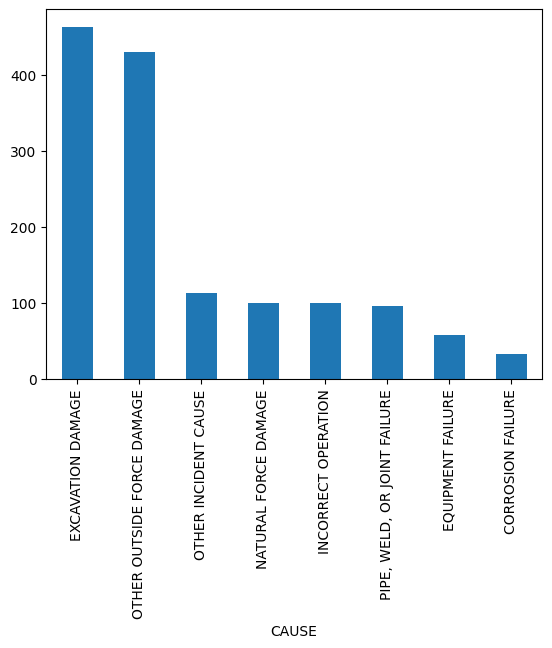

In [12]:
complete_data['CAUSE'].value_counts().plot.bar()

In [16]:
climate_data= complete_data[complete_data['CAUSE']=='NATURAL FORCE DAMAGE']
climate_data

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TELEPHONE,PREPARER_FAX,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
16,05-04-2023,2023,20230025,38039,SUPPLEMENTAL FINAL,31044,"LOWER VALLEY ENERGY, INC.",236 N. WASHINGTON BLVD/P.O. BOX 188,AFTON,WY,...,307 885 6151,307 885 5787,NaN,NaN,NaN,CRAIG COLES,DIRECTOR OF GAS OPERATIONS,307 885 6151,ccoles@lvenergy.com,ON MARCH 25TH 2023 LOWER VALLEY ENERGY WAS CAL...
19,04-10-2023,2023,20230018,37922,ORIGINAL,31632,NORTHWESTERN CORPORATION,3010 W. 69TH ST.,SIOUX FALLS,SD,...,605-353-7462,605-353-7519,MELISSA BARUTH,melissa.baruth@northwestern.com,605-353-7462,MELISSA BARUTH,DOT SUPERVISOR,605-353-7462,melissa.baruth@northwestern.com,"NARRATIVE 6619 WENTWORTH PARK DRIVE, WENTWORTH..."
23,3/24/2023,2023,20230015,37871,ORIGINAL,31632,NORTHWESTERN CORPORATION,3010 W. 69TH ST.,SIOUX FALLS,SD,...,6053537462,NaN,MELISSA BARUTH,melissa.baruth@northwestern.com,6053537462,MELISSA BARUTH,DOT SUPERVISOR,6053537462,melissa.baruth@northwestern.com,2/23/2023 AT ABOUT 11:22 AM 911 NOTIFIED ALL V...
30,02-01-2023,2023,20230006,37843,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,6121 BOLLINGER CANYON RD.,SAN RAMON,CA,...,510/298-7063,NaN,NaN,NaN,NaN,SUSIE RICHMOND,GAS REGULATORY COMPLIANCE MANAGER,925/786-0267,gsr8,"ON JANUARY 6, 2023, AT 09:50, PG&E INCIDENT ON..."
73,4/25/2022,2022,20220033,36728,SUPPLEMENTAL FINAL,4499,CENTERPOINT ENERGY RESOURCES CORPORATION,1111 LOUISIANA ST,HOUSTON,TX,...,713-967-9325,NaN,JASON SURRATT,jason.surratt@centerpointenergy.com,7775006234,RANDALL SANDERS,DIRECTOR OF OPERATIONS TX. REGION,713-207-5708,randall.x.sanders@centerpointenergy.com,DURING A LOCAL THUNDER STORM A PONTOON BOAT ON...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,3/25/2010,2010,20100008,15008,ORIGINAL FINAL,8040,AMERENIP,500 SOUTH 27TH STREET,DECATUR,IL,...,217-625-6804,217-625-6803,NaN,NaN,NaN,JEROME THEMIG,MANAGER OF GAS COMPLIANCE,217-625-6804,jthemig@ameren.com,AMERENIP RECEIVED A CALL FROM AN OCCUPANT AT A...
1370,3/15/2010,2010,20100003,15023,SUPPLEMENTAL FINAL,31840,UNISOURCE ENERGY SERVICES,2901 W. SHAMRELL BLVD.,FLAGSTAFF,AZ,...,928 532-3801,928 537-3994,NaN,NaN,NaN,ROBERT ADAMS,SHOW LOW DISTRICT MANAGER,928 532-3801,radams@uesaz.com,ON 2/22/10 PINETOP FIRE DEPARTMENT RESPONDED T...
1384,11-04-2011,2010,20110379,15342,ORIGINAL FINAL,1640,BOSTON GAS CO,170 DATA DRIVE,WALTHAM,MA,...,7819071854,7819075701,NaN,NaN,NaN,CHRISTOPHER S ARONSON,SENIOR COUNSEL,7819071854,christopher.aronson@us.ngrid.com,NaN
1387,3/31/2010,2010,20100012,15012,ORIGINAL,15952,PUBLIC SERVICE ELECTRIC & GAS CO,80 PARK PLAZA M/C - T18,NEWARK,NJ,...,9734307986,9736241937,NaN,NaN,NaN,MICHAEL SCHMID,SOUTHERN DIVISION MANAGER,6092392470,michael.schmid@pseg.com,AT APPROXIMATELY 3:05AM PUBLIC SERVICE ELECTRI...


In [18]:
climate_data['CAUSE_DETAILS'].value_counts()

CAUSE_DETAILS
LIGHTNING                                        29
HEAVY RAINS/FLOODS                               19
TEMPERATURE                                      16
OTHER NATURAL FORCE DAMAGE                       13
EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS    11
HIGH WINDS                                        6
SNOW/ICE IMPACT OR ACCUMULATION                   5
TREES/VEGETATION ROOTS                            1
Name: count, dtype: int64

<Axes: xlabel='CAUSE_DETAILS'>

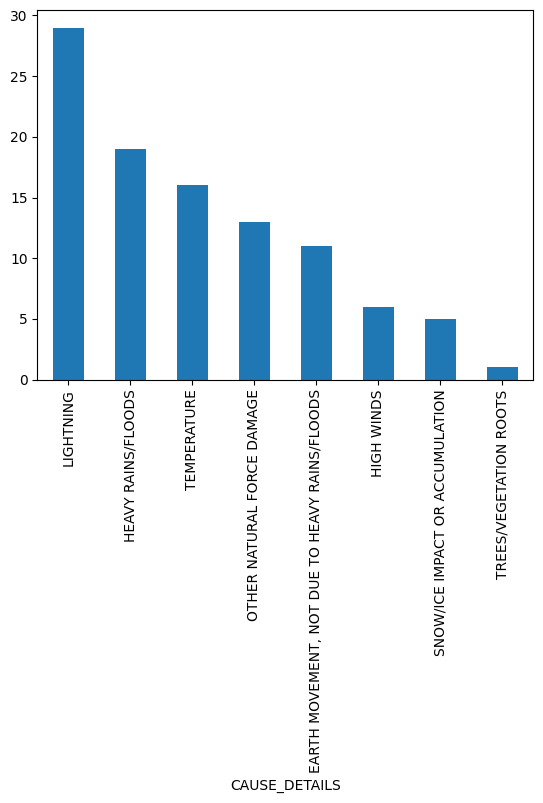

In [20]:
climate_data['CAUSE_DETAILS'].value_counts().plot.bar()

In [21]:
climate_data.isna()

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TELEPHONE,PREPARER_FAX,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
16,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1370,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1384,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,True
1387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False


In [29]:
climate_data_non_null =climate_data.dropna(how='all').dropna(how='all', axis=1)
climate_data_non_null

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TELEPHONE,PREPARER_FAX,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
16,05-04-2023,2023,20230025,38039,SUPPLEMENTAL FINAL,31044,"LOWER VALLEY ENERGY, INC.",236 N. WASHINGTON BLVD/P.O. BOX 188,AFTON,WY,...,307 885 6151,307 885 5787,NaN,NaN,NaN,CRAIG COLES,DIRECTOR OF GAS OPERATIONS,307 885 6151,ccoles@lvenergy.com,ON MARCH 25TH 2023 LOWER VALLEY ENERGY WAS CAL...
19,04-10-2023,2023,20230018,37922,ORIGINAL,31632,NORTHWESTERN CORPORATION,3010 W. 69TH ST.,SIOUX FALLS,SD,...,605-353-7462,605-353-7519,MELISSA BARUTH,melissa.baruth@northwestern.com,605-353-7462,MELISSA BARUTH,DOT SUPERVISOR,605-353-7462,melissa.baruth@northwestern.com,"NARRATIVE 6619 WENTWORTH PARK DRIVE, WENTWORTH..."
23,3/24/2023,2023,20230015,37871,ORIGINAL,31632,NORTHWESTERN CORPORATION,3010 W. 69TH ST.,SIOUX FALLS,SD,...,6053537462,NaN,MELISSA BARUTH,melissa.baruth@northwestern.com,6053537462,MELISSA BARUTH,DOT SUPERVISOR,6053537462,melissa.baruth@northwestern.com,2/23/2023 AT ABOUT 11:22 AM 911 NOTIFIED ALL V...
30,02-01-2023,2023,20230006,37843,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,6121 BOLLINGER CANYON RD.,SAN RAMON,CA,...,510/298-7063,NaN,NaN,NaN,NaN,SUSIE RICHMOND,GAS REGULATORY COMPLIANCE MANAGER,925/786-0267,gsr8,"ON JANUARY 6, 2023, AT 09:50, PG&E INCIDENT ON..."
73,4/25/2022,2022,20220033,36728,SUPPLEMENTAL FINAL,4499,CENTERPOINT ENERGY RESOURCES CORPORATION,1111 LOUISIANA ST,HOUSTON,TX,...,713-967-9325,NaN,JASON SURRATT,jason.surratt@centerpointenergy.com,7775006234,RANDALL SANDERS,DIRECTOR OF OPERATIONS TX. REGION,713-207-5708,randall.x.sanders@centerpointenergy.com,DURING A LOCAL THUNDER STORM A PONTOON BOAT ON...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,3/25/2010,2010,20100008,15008,ORIGINAL FINAL,8040,AMERENIP,500 SOUTH 27TH STREET,DECATUR,IL,...,217-625-6804,217-625-6803,NaN,NaN,NaN,JEROME THEMIG,MANAGER OF GAS COMPLIANCE,217-625-6804,jthemig@ameren.com,AMERENIP RECEIVED A CALL FROM AN OCCUPANT AT A...
1370,3/15/2010,2010,20100003,15023,SUPPLEMENTAL FINAL,31840,UNISOURCE ENERGY SERVICES,2901 W. SHAMRELL BLVD.,FLAGSTAFF,AZ,...,928 532-3801,928 537-3994,NaN,NaN,NaN,ROBERT ADAMS,SHOW LOW DISTRICT MANAGER,928 532-3801,radams@uesaz.com,ON 2/22/10 PINETOP FIRE DEPARTMENT RESPONDED T...
1384,11-04-2011,2010,20110379,15342,ORIGINAL FINAL,1640,BOSTON GAS CO,170 DATA DRIVE,WALTHAM,MA,...,7819071854,7819075701,NaN,NaN,NaN,CHRISTOPHER S ARONSON,SENIOR COUNSEL,7819071854,christopher.aronson@us.ngrid.com,NaN
1387,3/31/2010,2010,20100012,15012,ORIGINAL,15952,PUBLIC SERVICE ELECTRIC & GAS CO,80 PARK PLAZA M/C - T18,NEWARK,NJ,...,9734307986,9736241937,NaN,NaN,NaN,MICHAEL SCHMID,SOUTHERN DIVISION MANAGER,6092392470,michael.schmid@pseg.com,AT APPROXIMATELY 3:05AM PUBLIC SERVICE ELECTRI...


In [31]:
climate_data_non_null.to_csv('climate_data_non_null.csv')

In [35]:
climate_data_non_null_updated = pd.read_csv('../data/climate_data_non_null.csv', encoding='latin')

In [36]:
climate_data_non_null_updated

,REPORT_RECEIVED_DATE,IYEAR,LOCAL_DATETIME,LOCATION_LATITUDE,LOCATION_LONGITUDE,FLOW_CONT_KEY_CRIT_IND,FLOW_CONT_SERVICE_VALVE_IND,FLOW_CONT_METER_REG_IND,FLOW_CONT_SQUEEZE_OFF_IND,FLOW_CONT_STOPPLE_FITNG_IND,...,NF_OTHER_DETAILS,NF_EXTREME_WEATHER_IND,NF_HURRICANE_IND,NF_TROPICAL_STORM_IND,NF_TORNADO_IND,NF_OTHER_IND,NF_EXTREME_WEATHER_DETAILS,NF_HEAVY_RAINS_IND,NF_HIGH_WINDS_IND,NF_VEGITATION_ROOT_IND
0,05-04-2023,2023,3/25/2023 2:56,43.469763,-110.748873,NaN,NaN,YES,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04-10-2023,2023,03-11-2023 19:20,43.956200,-96.999100,NaN,NaN,YES,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/24/2023,2023,2/23/2023 11:22,44.017166,-97.097857,NaN,NaN,NaN,YES,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02-01-2023,2023,01-05-2023 06:22,37.965508,-122.334511,NaN,NaN,NaN,YES,NaN,...,NaN,YES,NaN,NaN,NaN,YES,HEAVY RAIN (BOMB CYCLONE + ATMOSPHERIC RIVER),NaN,NaN,NaN
4,4/25/2022,2022,04-05-2022 01:55,32.298620,-95.266160,NaN,NaN,YES,NaN,NaN,...,NaN,YES,NaN,NaN,NaN,YES,THUNDER STORMS/HIGH WINDS,YES,YES,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3/25/2010,2010,2/26/2010 14:17,41.235090,-89.930110,NaN,NaN,NaN,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,3/15/2010,2010,2/22/2010 20:57,34.109340,-109.860100,NaN,NaN,NaN,NaN,NaN,...,SNOW ACCUMULATION ON THE METER SET ASSEMBLY,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,11-04-2011,2010,1/25/2010 18:06,42.526781,-71.094024,NaN,NaN,NaN,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,3/31/2010,2010,1/18/2010 4:38,40.511140,-74.408060,NaN,NaN,NaN,NaN,NaN,...,UNKNOWN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
climate_data_non_null_updated.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 146 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    REPORT_RECEIVED_DATE            100 non-null    object 
 1    IYEAR                           100 non-null    int64  
 2    LOCAL_DATETIME                  100 non-null    object 
 3    LOCATION_LATITUDE               100 non-null    float64
 4    LOCATION_LONGITUDE              100 non-null    float64
 5    FLOW_CONT_KEY_CRIT_IND          2 non-null      object 
 6    FLOW_CONT_SERVICE_VALVE_IND     1 non-null      object 
 7    FLOW_CONT_METER_REG_IND         7 non-null      object 
 8    FLOW_CONT_SQUEEZE_OFF_IND       3 non-null      object 
 9    FLOW_CONT_STOPPLE_FITNG_IND     2 non-null      object 
 10   FLOW_CONT_OTHER_IND             1 non-null      object 
 11   FLOW_CONT_OTHER_DETAIL          1 non-null      object 
 12   NRC_RPT_DATETIME     